### <center> Задание по линейной регрессии
Данный набор данных - более чистая версия данных из лабораторной работы по очистке данных. Теперь будем строить модель линейной регрессии для прогнозирования стоимости жилья (столбец **price_doc**) в зависимости от всех остальных факторов.

Этапы:
1. Построить корреляционную матрицу, чтобы найти, какой признак больше всего коррелирует с ценой.
2. Постройте однофакторную модель регрессии по этому признаку. Сделайте анализ остатков модели, посмотрите на качество метрик (R-квадрат и MAE), сделайте выводы о качестве модели (написать комментарий).
3. Постройте многофакторную модель регрессии по всем признакам. Сделайте анализ остатков модели, посмотрите на качество метрик, сделайте выводы о качестве модели.
4. Поочередно выкидывайте признаки из модели, чтобы оценить, какие из них являются важными, а какие - нет. Сделайте выводы о важности признаков.

Далее, попробуем использовать подход разбиения данных на обучающую и тестовую выборки. Выберите признаки, с которыми получилась лучшая модель. Для этой модели необходимо сделать следующее:
5. Разбейте данные на обучающую и тестовую выборки, обучите модель, выведите метрики качества, сравните метрики на трейне и тесте
6. Если до сих пор вы не очищали даные от аномалий и выбросов, сделайте это и сново перестройте модель. Как это повлияло на качество модели?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split as tts

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('drive/My Drive/regression.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907,1.0,12.0,75377,Hamovniki,2750000,55485.2,14983.92,47.35,40.77,2.31,76.37
1,8138,2013-05-25,53,30.0,10.0,3.0,16.0,1.0,1980,2.0,8.0,68630,Lianozovo,9000000,55485.2,14983.92,47.35,40.77,2.31,76.37
2,8156,2013-05-27,77,41.0,2.0,1.0,17.0,6.0,2014,3.0,12.0,9553,Poselenie Voskresenskoe,7011550,55485.2,14983.92,47.35,40.77,2.31,76.37
3,8157,2013-05-27,45,27.0,6.0,3.0,9.0,1.0,1970,2.0,6.0,78616,Severnoe Butovo,7100000,55485.2,14983.92,47.35,40.77,2.31,76.37
4,8258,2013-05-30,74,46.0,12.0,3.0,24.0,1.0,2004,3.0,9.0,27992,Juzhnoe Medvedkovo,12100000,55485.2,14983.92,47.35,40.77,2.31,76.37


In [ ]:
data.corr()

,id,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
id,1.000000,0.047572,0.007082,0.020489,-0.105563,0.035155,0.021266,-0.013847,0.017088,-0.002109,-0.011505,0.072959,0.820880,0.896189,0.609556,-0.050312,-0.193437,0.756910
full_sq,0.047572,1.000000,0.249767,0.160430,-0.067906,0.210499,0.049657,-0.006277,0.708513,0.039477,-0.022089,0.634608,0.052252,0.060446,0.016030,-0.035652,-0.040892,0.041105
life_sq,0.007082,0.249767,1.000000,0.034202,-0.068710,0.044023,0.010075,-0.002417,0.181143,0.002197,-0.019616,0.137888,-0.001363,0.009860,0.001000,-0.004863,-0.006890,-0.005509
floor,0.020489,0.160430,0.034202,1.000000,-0.069236,0.537254,0.031061,0.001479,0.002473,0.007214,-0.020477,0.137385,0.023191,0.024981,0.002392,-0.021423,-0.021676,0.019126
state,-0.105563,-0.067906,-0.068710,-0.069236,1.000000,-0.026325,-0.084279,0.304078,0.065234,0.024303,0.072079,0.106716,-0.097458,-0.108998,-0.049222,0.047281,0.054033,-0.086235
max_floor,0.035155,0.210499,0.044023,0.537254,-0.026325,1.000000,0.077608,-0.000291,-0.004804,0.038296,0.000004,0.161406,0.032826,0.042137,0.008058,-0.029636,-0.032839,0.026313
material,0.021266,0.049657,0.010075,0.031061,-0.084279,0.077608,1.000000,-0.004831,-0.041341,0.034055,0.019234,0.060954,0.006922,0.026442,0.009165,-0.013824,-0.016946,-0.000067
build_year,-0.013847,-0.006277,-0.002417,0.001479,0.304078,-0.000291,-0.004831,1.000000,-0.008819,0.000478,-0.000876,0.002159,-0.016022,-0.009669,-0.009700,0.003141,-0.002827,-0.017266
num_room,0.017088,0.708513,0.181143,0.002473,0.065234,-0.004804,-0.041341,-0.008819,1.000000,0.015373,-0.004929,0.472094,0.019586,0.028146,0.003765,-0.016515,-0.021919,0.011347
kitch_sq,-0.002109,0.039477,0.002197,0.007214,0.024303,0.038296,0.034055,0.000478,0.015373,1.000000,-0.000167,0.026619,-0.004369,0.003220,0.001304,-0.002743,-0.001924,-0.007706


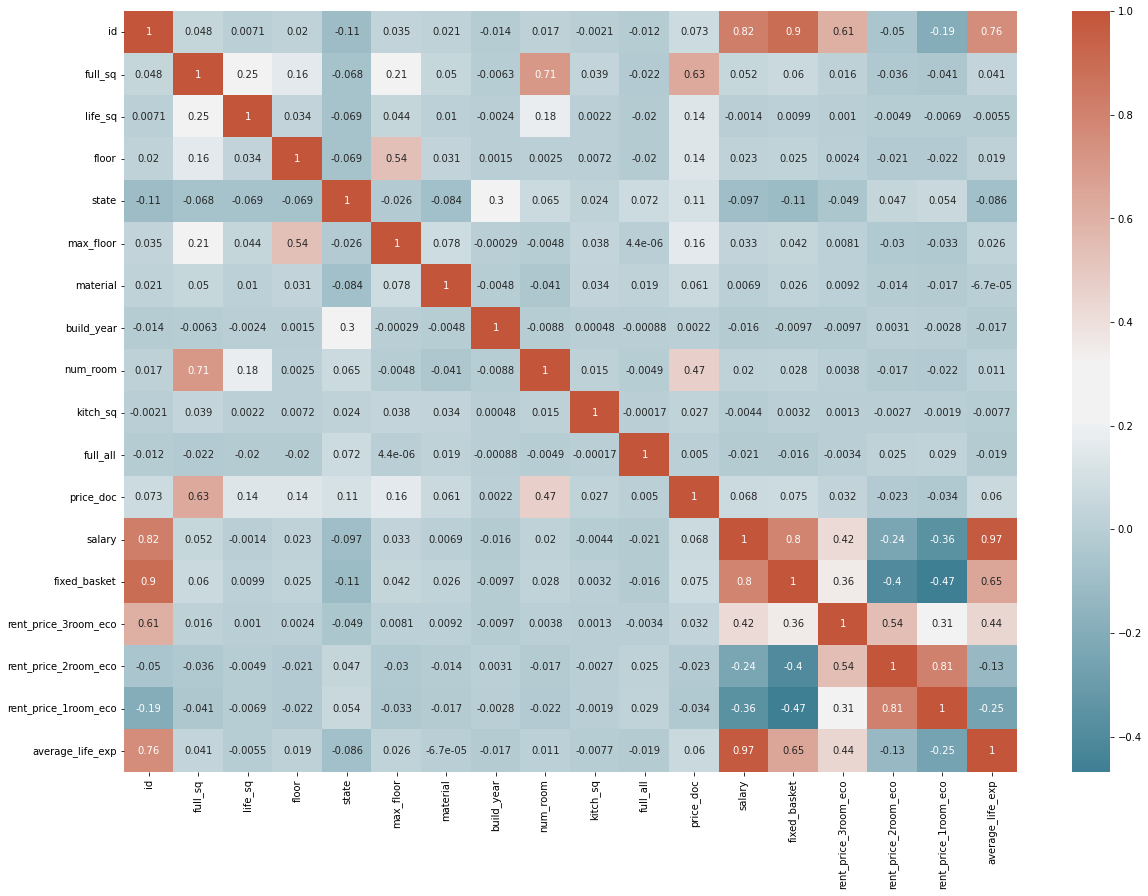

In [ ]:
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
plt.subplots(figsize=(20, 14))
sns.heatmap(data.corr(),cmap=cmap,  annot=True);

Можно заметить, что price_doc лучше всего связан с full_sq (0.634) и num_room (0.472)

In [ ]:
x = data[['full_sq']]
y = data['price_doc']

reg_model = lr()

In [ ]:
reg_model.fit(x, y)

LinearRegression()

In [ ]:
pred_1 = reg_model.predict(x)

In [ ]:
print('R2: ', r2_score(y, pred_1))

R2:  0.40272744877628297


In [ ]:
print('Mean absolute error (MAE)', mean_absolute_error(y, pred_1))

Mean absolute error (MAE) 2427536.071947832


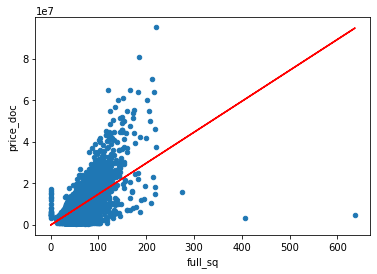

In [ ]:
data.plot(x='full_sq',y='price_doc',kind='scatter')
plt.plot(data['full_sq'], pred_1,color='red');

R2: показатель в 0.4 является относительно неплохим, но не лучшим

MAE: относительно стоимости квартир показатель очень большой, что очень плохо

Выбросы: для цены это все, что больше 6 млн, для общей площади - больше 200

In [ ]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model2 = lr()
reg_model2.fit(x,y)
pred3 = reg_model2.predict(x)
print('R2: ', r2_score(y, pred3))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred3))

R2:  0.4349392174372788
Mean absolute error (MAE) 2304860.6023075744


In [ ]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred3})
residuals.head()

,price,predictions
0,2750000,1.821025e+06
1,9000000,8.332184e+06
2,7011550,1.021133e+07
3,7100000,6.957155e+06
4,12100000,1.165225e+07


In [ ]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.821025e+06,9.289751e+05
1,9000000,8.332184e+06,6.678162e+05
2,7011550,1.021133e+07,-3.199783e+06
3,7100000,6.957155e+06,1.428454e+05
4,12100000,1.165225e+07,4.477520e+05


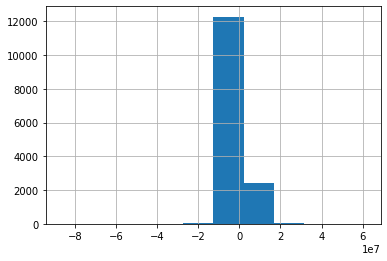

In [ ]:
residuals['errors'].hist()

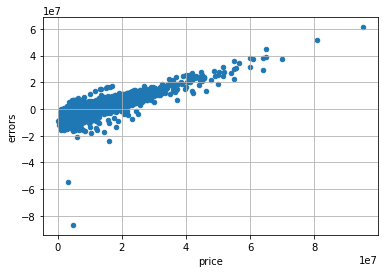

In [ ]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Исходя из всего вышеперечисленного могу сделать вывод, что качество модели оставляет желать лучшего (слишком большие показатели ошибок, пусть и R2 неплохой)

Также в графике можно заметить выбросы

Убрал average_life_exp (средняя продолжительность жизни)

In [ ]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco']] 
y = data['price_doc']
reg_model3 = lr()
reg_model3.fit(x,y)
pred4 = reg_model3.predict(x)
print('R2: ', r2_score(y, pred4))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred4))

R2:  0.43491447240169456
Mean absolute error (MAE) 2304808.383793458


In [ ]:
residuals2 = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred4})
residuals2.head()

,price,predictions
0,2750000,1.883392e+06
1,9000000,8.395562e+06
2,7011550,1.027502e+07
3,7100000,7.021447e+06
4,12100000,1.171867e+07


In [ ]:
residuals2['errors'] = residuals2['price']-residuals2['predictions']
residuals2.head()

,price,predictions,errors
0,2750000,1.883392e+06,8.666077e+05
1,9000000,8.395562e+06,6.044384e+05
2,7011550,1.027502e+07,-3.263474e+06
3,7100000,7.021447e+06,7.855333e+04
4,12100000,1.171867e+07,3.813260e+05


In [ ]:
tmp = residuals2.copy()
tmp[tmp['errors']<0].mean()

price          5.645996e+06
predictions    8.204285e+06
errors        -2.558289e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.493762e+06
predictions    7.396732e+06
errors         2.097030e+06
dtype: float64

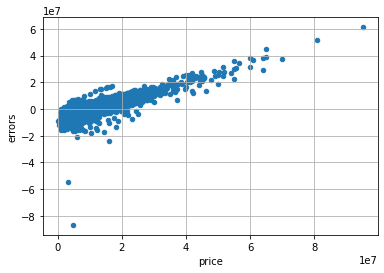

In [ ]:
residuals2.plot(x='price',y='errors',kind='scatter',grid=True)

Удаление средней продолжительности жизни не особо сказалось на модели (качество также оставляет желать лучшего)

Убрал стоимость аренды 1-комнатной квартиры

In [ ]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'average_life_exp']] 
y = data['price_doc']
reg_model4 = lr()
reg_model4.fit(x,y)
pred5 = reg_model4.predict(x)
print('R2: ', r2_score(y, pred5))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred5))

R2:  0.4349350708436749
Mean absolute error (MAE) 2304894.2928132177


In [ ]:
residuals3 = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred5})
residuals3.head()

,price,predictions
0,2750000,1.386925e+06
1,9000000,7.898170e+06
2,7011550,9.777777e+06
3,7100000,6.523064e+06
4,12100000,1.121839e+07


In [ ]:
residuals3['errors'] = residuals2['price']-residuals2['predictions']
residuals3.head()

,price,predictions,errors
0,2750000,1.386925e+06,8.666077e+05
1,9000000,7.898170e+06,6.044384e+05
2,7011550,9.777777e+06,-3.263474e+06
3,7100000,6.523064e+06,7.855333e+04
4,12100000,1.121839e+07,3.813260e+05


In [ ]:
tmp = residuals3.copy()
tmp[tmp['errors']<0].mean()

price          5.645996e+06
predictions    8.204214e+06
errors        -2.558289e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.493762e+06
predictions    7.396790e+06
errors         2.097030e+06
dtype: float64

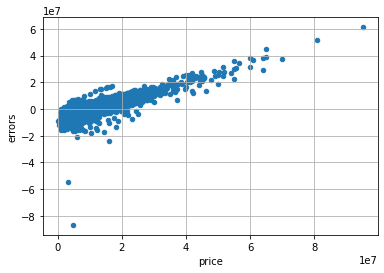

In [ ]:
residuals3.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал стоимость аренды 2-комнатной квартиры

In [ ]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	'rent_price_1room_eco',	'average_life_exp']] 
y = data['price_doc']
reg_model5 = lr()
reg_model5.fit(x,y)
pred6 = reg_model5.predict(x)
print('R2: ', r2_score(y, pred6))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred6))

R2:  0.43493126375163116
Mean absolute error (MAE) 2304852.6521077342


In [ ]:
residuals4 = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred6})
residuals4.head()

,price,predictions
0,2750000,1.573365e+06
1,9000000,8.084961e+06
2,7011550,9.963781e+06
3,7100000,6.710399e+06
4,12100000,1.140633e+07


In [ ]:
residuals4['errors'] = residuals4['price']-residuals4['predictions']
residuals4.head()

,price,predictions,errors
0,2750000,1.573365e+06,1.176635e+06
1,9000000,8.084961e+06,9.150394e+05
2,7011550,9.963781e+06,-2.952231e+06
3,7100000,6.710399e+06,3.896008e+05
4,12100000,1.140633e+07,6.936650e+05


In [ ]:
tmp = residuals4.copy()
tmp[tmp['errors']<0].mean()

price          5.645317e+06
predictions    8.202505e+06
errors        -2.557189e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.495737e+06
predictions    7.397894e+06
errors         2.097844e+06
dtype: float64

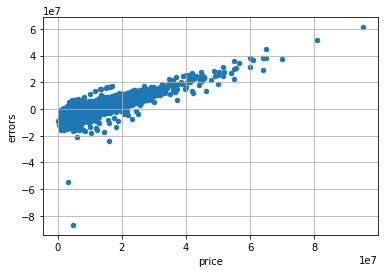

In [ ]:
residuals4.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал стоимость аренды 3-комнатной квартиры

In [ ]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']] 
y = data['price_doc']
reg_model6 = lr()
reg_model6.fit(x,y)
pred7 = reg_model6.predict(x)
print('R2: ', r2_score(y, pred7))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred7))

R2:  0.43489735232090654
Mean absolute error (MAE) 2305137.1989678605


In [ ]:
residuals5 = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred7})
residuals5.head()

,price,predictions
0,2750000,1.746970e+06
1,9000000,8.257403e+06
2,7011550,1.013430e+07
3,7100000,6.882299e+06
4,12100000,1.157616e+07


In [ ]:
residuals5['errors'] = residuals5['price']-residuals5['predictions']
residuals5.head()

,price,predictions,errors
0,2750000,1.746970e+06,1.003030e+06
1,9000000,8.257403e+06,7.425967e+05
2,7011550,1.013430e+07,-3.122754e+06
3,7100000,6.882299e+06,2.177013e+05
4,12100000,1.157616e+07,5.238436e+05


In [ ]:
tmp = residuals5.copy()
tmp[tmp['errors']<0].mean()

price          5.639905e+06
predictions    8.198559e+06
errors        -2.558654e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.498754e+06
predictions    7.401425e+06
errors         2.097329e+06
dtype: float64

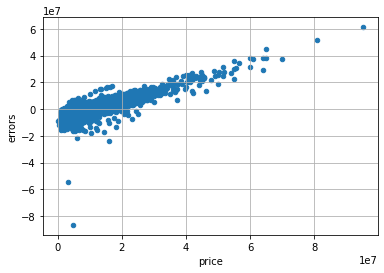

In [ ]:
residuals5.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал стоимость потребительской корзины

In [ ]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']] 
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.43492784454494815
Mean absolute error (MAE) 2304827.325085801


In [ ]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.875527e+06
1,9000000,8.387725e+06
2,7011550,1.026752e+07
3,7100000,7.013340e+06
4,12100000,1.171030e+07


In [ ]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.875527e+06,8.744727e+05
1,9000000,8.387725e+06,6.122751e+05
2,7011550,1.026752e+07,-3.255972e+06
3,7100000,7.013340e+06,8.665953e+04
4,12100000,1.171030e+07,3.896987e+05


In [ ]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.647651e+06
predictions    8.204046e+06
errors        -2.556395e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.494767e+06
predictions    7.396431e+06
errors         2.098336e+06
dtype: float64

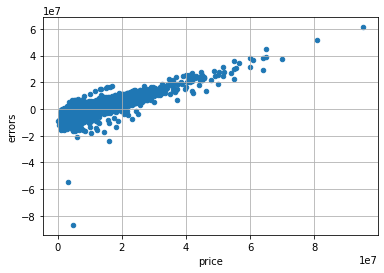

In [ ]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал среднюю зарплату

In [ ]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']] 
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.43491632289627913
Mean absolute error (MAE) 2304843.0283602695


In [ ]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.867571e+06
1,9000000,8.379544e+06
2,7011550,1.025917e+07
3,7100000,7.005383e+06
4,12100000,1.170245e+07


In [ ]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.867571e+06,8.824287e+05
1,9000000,8.379544e+06,6.204556e+05
2,7011550,1.025917e+07,-3.247623e+06
3,7100000,7.005383e+06,9.461699e+04
4,12100000,1.170245e+07,3.975476e+05


In [ ]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.646049e+06
predictions    8.203993e+06
errors        -2.557944e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.494191e+06
predictions    7.396872e+06
errors         2.097319e+06
dtype: float64

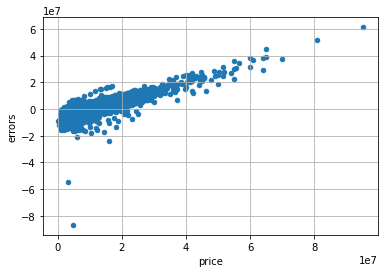

In [ ]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал количество населения

In [ ]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']] 
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.43489282745891844
Mean absolute error (MAE) 2304184.4341901042


In [ ]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.816843e+06
1,9000000,8.326866e+06
2,7011550,1.020975e+07
3,7100000,6.950931e+06
4,12100000,1.165129e+07


In [ ]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.816843e+06,9.331573e+05
1,9000000,8.326866e+06,6.731344e+05
2,7011550,1.020975e+07,-3.198199e+06
3,7100000,6.950931e+06,1.490687e+05
4,12100000,1.165129e+07,4.487096e+05


In [ ]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.644257e+06
predictions    8.199556e+06
errors        -2.555299e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.498027e+06
predictions    7.400018e+06
errors         2.098009e+06
dtype: float64

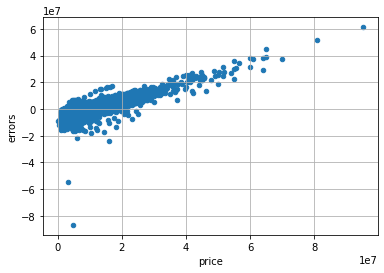

In [ ]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

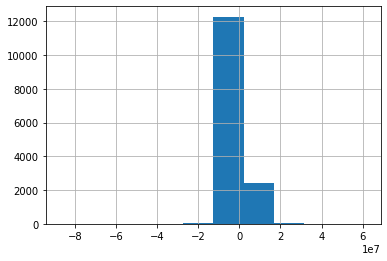

In [ ]:
residuals['errors'].hist()
#здесь решил проверить отображение гистограммы (результат ожидаемый, но все же)

Пока модель также нельзя назвать хорошей

Убрал площадь кухни

In [ ]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']] 
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.43492231734561826
Mean absolute error (MAE) 2304884.235150319


In [ ]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.826252e+06
1,9000000,8.332700e+06
2,7011550,1.021287e+07
3,7100000,6.957198e+06
4,12100000,1.165216e+07


In [ ]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.826252e+06,9.237478e+05
1,9000000,8.332700e+06,6.673004e+05
2,7011550,1.021287e+07,-3.201318e+06
3,7100000,6.957198e+06,1.428020e+05
4,12100000,1.165216e+07,4.478446e+05


In [ ]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.642453e+06
predictions    8.201977e+06
errors        -2.559524e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.495246e+06
predictions    7.398919e+06
errors         2.096327e+06
dtype: float64

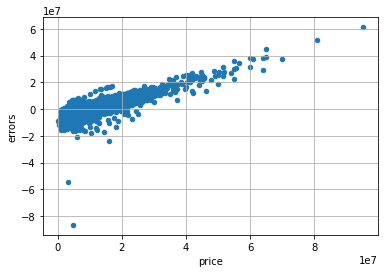

In [ ]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал количество комнат

In [ ]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.4346284090110023
Mean absolute error (MAE) 2303160.8357242234


In [ ]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.842166e+06
1,9000000,8.361369e+06
2,7011550,1.014164e+07
3,7100000,6.973780e+06
4,12100000,1.160154e+07


In [ ]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.842166e+06,9.078343e+05
1,9000000,8.361369e+06,6.386308e+05
2,7011550,1.014164e+07,-3.130086e+06
3,7100000,6.973780e+06,1.262198e+05
4,12100000,1.160154e+07,4.984590e+05


In [ ]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.615355e+06
predictions    8.167990e+06
errors        -2.552635e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.523679e+06
predictions    7.425570e+06
errors         2.098108e+06
dtype: float64

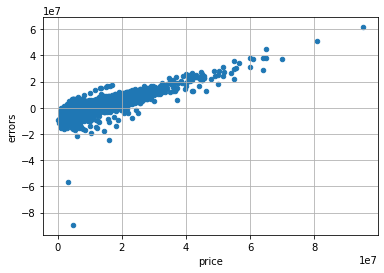

In [ ]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал год постройки

In [ ]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.4330870377885634
Mean absolute error (MAE) 2309061.194194859


In [ ]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.645511e+06
1,9000000,8.149590e+06
2,7011550,1.020505e+07
3,7100000,6.779073e+06
4,12100000,1.147893e+07


In [ ]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.645511e+06,1.104489e+06
1,9000000,8.149590e+06,8.504095e+05
2,7011550,1.020505e+07,-3.193500e+06
3,7100000,6.779073e+06,3.209268e+05
4,12100000,1.147893e+07,6.210729e+05


In [ ]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.620973e+06
predictions    8.194781e+06
errors        -2.573808e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.500930e+06
predictions    7.407230e+06
errors         2.093700e+06
dtype: float64

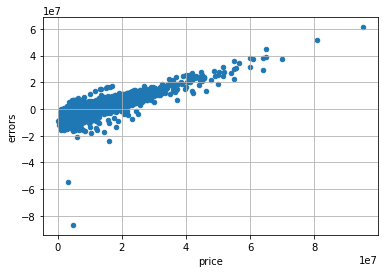

In [ ]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал материал стен

In [ ]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.43315689896258236
Mean absolute error (MAE) 2303944.5783695965


In [ ]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.829489e+06
1,9000000,8.517441e+06
2,7011550,9.737520e+06
3,7100000,7.121629e+06
4,12100000,1.184765e+07


In [ ]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.829489e+06,9.205111e+05
1,9000000,8.517441e+06,4.825591e+05
2,7011550,9.737520e+06,-2.725970e+06
3,7100000,7.121629e+06,-2.162893e+04
4,12100000,1.184765e+07,2.523463e+05


In [ ]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.666505e+06
predictions    8.199169e+06
errors        -2.532664e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.507615e+06
predictions    7.394501e+06
errors         2.113114e+06
dtype: float64

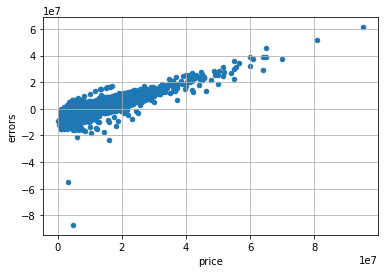

In [ ]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал количество этажей в здании

In [ ]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.4349007243073314
Mean absolute error (MAE) 2305082.0887169125


In [ ]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.845746e+06
1,9000000,8.328429e+06
2,7011550,1.017501e+07
3,7100000,6.978254e+06
4,12100000,1.160724e+07


In [ ]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.845746e+06,9.042544e+05
1,9000000,8.328429e+06,6.715707e+05
2,7011550,1.017501e+07,-3.163459e+06
3,7100000,6.978254e+06,1.217462e+05
4,12100000,1.160724e+07,4.927553e+05


In [ ]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.645121e+06
predictions    8.200268e+06
errors        -2.555147e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.498738e+06
predictions    7.399138e+06
errors         2.099600e+06
dtype: float64

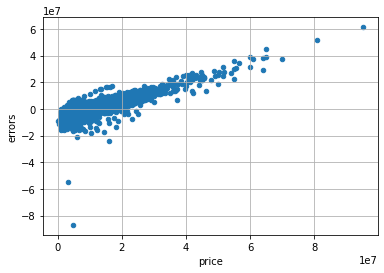

In [ ]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал жилищные условия

In [ ]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.40958935953147246
Mean absolute error (MAE) 2428571.1236413354


In [ ]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.198902e+06
1,9000000,7.614610e+06
2,7011550,1.150614e+07
3,7100000,6.288956e+06
4,12100000,1.101331e+07


In [ ]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.198902e+06,1.551098e+06
1,9000000,7.614610e+06,1.385390e+06
2,7011550,1.150614e+07,-4.494587e+06
3,7100000,6.288956e+06,8.110444e+05
4,12100000,1.101331e+07,1.086691e+06


In [ ]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.483183e+06
predictions    8.252285e+06
errors        -2.769102e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.539048e+06
predictions    7.376426e+06
errors         2.162622e+06
dtype: float64

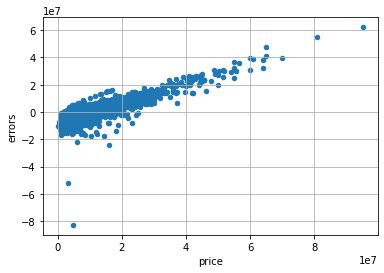

In [ ]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Показатель детерминации изменился в худшую сторону; пока модель также нельзя назвать хорошей

Убрал этаж

In [ ]:
x = data[['id',	'full_sq',	'life_sq',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.433558725905992
Mean absolute error (MAE) 2306457.0797751625


In [ ]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.865949e+06
1,9000000,8.260211e+06
2,7011550,1.053471e+07
3,7100000,6.922021e+06
4,12100000,1.164985e+07


In [ ]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.865949e+06,8.840511e+05
1,9000000,8.260211e+06,7.397890e+05
2,7011550,1.053471e+07,-3.523159e+06
3,7100000,6.922021e+06,1.779788e+05
4,12100000,1.164985e+07,4.501520e+05


In [ ]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.628143e+06
predictions    8.182139e+06
errors        -2.553996e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.516036e+06
predictions    7.413373e+06
errors         2.102662e+06
dtype: float64

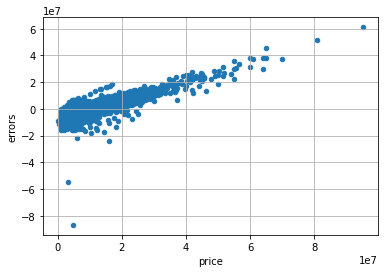

In [ ]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал жилую площадь

In [ ]:
x = data[['id',	'full_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.4348108479608125
Mean absolute error (MAE) 2305019.223367592


In [ ]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.820118e+06
1,9000000,8.320833e+06
2,7011550,1.018505e+07
3,7100000,6.947738e+06
4,12100000,1.164094e+07


In [ ]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.820118e+06,9.298818e+05
1,9000000,8.320833e+06,6.791673e+05
2,7011550,1.018505e+07,-3.173497e+06
3,7100000,6.947738e+06,1.522625e+05
4,12100000,1.164094e+07,4.590576e+05


In [ ]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.644452e+06
predictions    8.202975e+06
errors        -2.558523e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.495028e+06
predictions    7.397805e+06
errors         2.097222e+06
dtype: float64

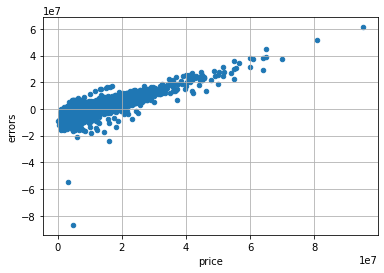

In [ ]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал полную площадь

In [ ]:
x = data[['id',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.27401986169435266
Mean absolute error (MAE) 2520577.145094825


In [ ]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,4.013626e+06
1,9000000,8.138457e+06
2,7011550,1.023075e+07
3,7100000,7.157772e+06
4,12100000,1.176790e+07


In [ ]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,4.013626e+06,-1.263626e+06
1,9000000,8.138457e+06,8.615426e+05
2,7011550,1.023075e+07,-3.219205e+06
3,7100000,7.157772e+06,-5.777166e+04
4,12100000,1.176790e+07,3.321024e+05


In [ ]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.706789e+06
predictions    8.143489e+06
errors        -2.436700e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.960641e+06
predictions    7.350207e+06
errors         2.610434e+06
dtype: float64

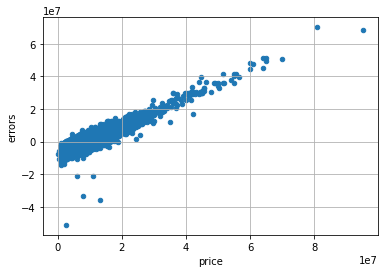

In [ ]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Заметное ухудшение показателя детерминации, что говорит о важности признака; имеются изменения в графике рассеяния; пока модель также нельзя назвать хорошей

Убрал id

In [ ]:
x = data[['full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.43491190047646633
Mean absolute error (MAE) 2305029.771740145


In [ ]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.742189e+06
1,9000000,8.251531e+06
2,7011550,1.013070e+07
3,7100000,6.875417e+06
4,12100000,1.156759e+07


In [ ]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.742189e+06,1.007811e+06
1,9000000,8.251531e+06,7.484695e+05
2,7011550,1.013070e+07,-3.119149e+06
3,7100000,6.875417e+06,2.245834e+05
4,12100000,1.156759e+07,5.324079e+05


In [ ]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.642568e+06
predictions    8.201869e+06
errors        -2.559302e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.495625e+06
predictions    7.398909e+06
errors         2.096717e+06
dtype: float64

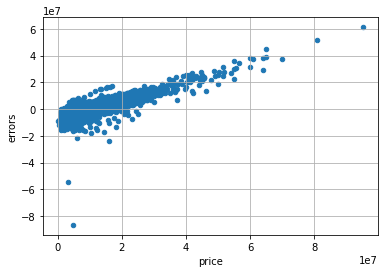

In [ ]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

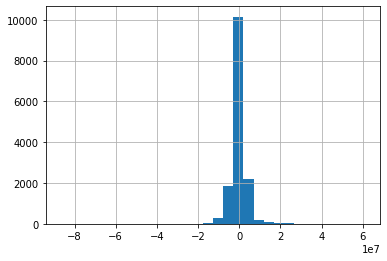

In [ ]:
residuals['errors'].hist(bins=30)

Пока модель также нельзя назвать хорошей

Вывод: значительную роль на модель сыграл показатель общей площади квартиры; жилищные условия оказали более слабое, но ощутимое влияние по сравнению с остальными признаками; в целом распределение ошибок нормальное

Далее необходимо выбрать лучшую модель: таковой является та, где все признаки сравниваются с ценой (определял по коэф-ту детерминации)

In [ ]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.4349392174372788
Mean absolute error (MAE) 2304860.6023075744


In [ ]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.821025e+06
1,9000000,8.332184e+06
2,7011550,1.021133e+07
3,7100000,6.957155e+06
4,12100000,1.165225e+07


In [ ]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.821025e+06,9.289751e+05
1,9000000,8.332184e+06,6.678162e+05
2,7011550,1.021133e+07,-3.199783e+06
3,7100000,6.957155e+06,1.428454e+05
4,12100000,1.165225e+07,4.477520e+05


In [ ]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.642830e+06
predictions    8.202327e+06
errors        -2.559497e+06
dtype: float64

In [ ]:
tmp[tmp['errors']>=0].mean()

price          9.494938e+06
predictions    7.398632e+06
errors         2.096305e+06
dtype: float64

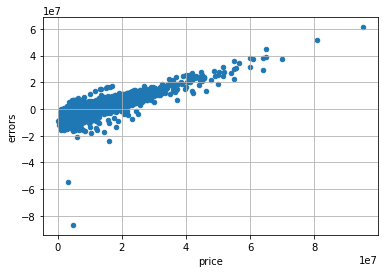

In [ ]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

In [ ]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state = 22)
reg_model = lr()
reg_model.fit(x_train, y_train)
pred_train = reg_model.predict(x_train)

print('Метрики на трейне:')
print('R2: ', r2_score(y_train, pred_train)) 
print('Mean absolute error (MAE)', mean_absolute_error(y_train, pred_train))

pred_test = reg_model.predict(x_test)
print('_'*50)
print('Метрики на тесте:')
print('R2: ', r2_score(y_test, pred_test)) 
print('Mean absolute error (MAE)', mean_absolute_error(y_test, pred_test))

Метрики на трейне:
R2:  0.4314591921627885
Mean absolute error (MAE) 2324906.763330137
__________________________________________________
Метрики на тесте:
R2:  0.18720160894583981
Mean absolute error (MAE) 2283593.3082804796


Показатели метрик нельзя назвать хорошими (особенно на  тесте)

Создаем выборку без выбросов (отталкиваемся от общей площади)

In [ ]:
ind = data[(data['full_sq']>200)].index
clean_data = data.drop(ind, axis='index')

In [ ]:
x = clean_data[['full_sq']]
y = clean_data['price_doc']

reg_model = lr()
reg_model.fit(x, y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.4240399830280731
Mean absolute error (MAE) 2422263.152019456


После очистки однофакторная модель стала немного лучше

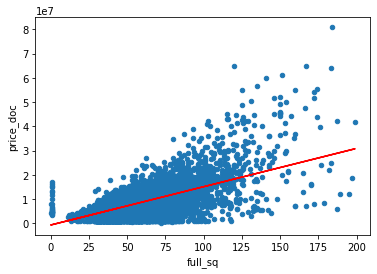

In [ ]:
clean_data.plot(x='full_sq',y='price_doc',kind='scatter')
plt.plot(clean_data['full_sq'], pred,color='red');

Избавляемся от "нулей"

In [ ]:
ind = clean_data[(clean_data['full_sq']<6)].index #на глаз тяжело определить :)
clean_data1 = clean_data.drop(ind, axis='index')

In [ ]:
x = clean_data1[['full_sq']]
y = clean_data1['price_doc']

reg_model = lr()
reg_model.fit(x, y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.4298473232110761
Mean absolute error (MAE) 2419622.236104089


Улучшение есть, но едва заметное; продолжим обучение модели уже на данной выборке

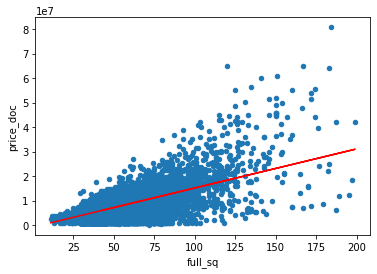

In [ ]:
clean_data1.plot(x='full_sq',y='price_doc',kind='scatter')
plt.plot(clean_data1['full_sq'], pred,color='red');

In [ ]:
x = clean_data1[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = clean_data1['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.4653031605246811
Mean absolute error (MAE) 2298151.309533259


Метрики улучшились, что логично

In [ ]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state = 22)
reg_model = lr()
reg_model.fit(x_train, y_train)
pred_train = reg_model.predict(x_train)

print('Метрики на трейне:')
print('R2: ', r2_score(y_train, pred_train)) 
print('Mean absolute error (MAE)', mean_absolute_error(y_train, pred_train))

pred_test = reg_model.predict(x_test)
print('_'*50)
print('Метрики на тесте:')
print('R2: ', r2_score(y_test, pred_test)) 
print('Mean absolute error (MAE)', mean_absolute_error(y_test, pred_test))

Метрики на трейне:
R2:  0.4674609192636817
Mean absolute error (MAE) 2329342.902305948
__________________________________________________
Метрики на тесте:
R2:  0.45101706021501464
Mean absolute error (MAE) 2247626.89277557


Совсем другое дело: трейн изменился (не сильно) в лучшую сторону, тест (довольно заметно) тоже